In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime
import os
import importlib
from IPython.display import Audio

os.chdir("..")
import context
context.get()

import baseMethods
importlib.reload(baseMethods)

import magSonify
from magSonify import SimulateData

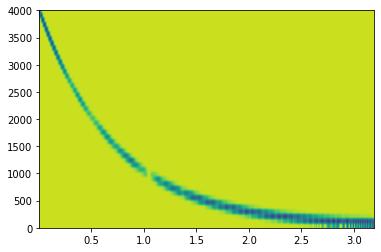

In [41]:
def myProcessing(algorithm='waveletStretch'):
    before, expect = baseMethods.getBeforeAndExpectation_Sweep(4000,50,0.2)
    actual = before.copy()
    getattr(actual,algorithm)(16)
    expect.normalise()
    actual.normalise()

    NFFT = 256*2
    noverlap = NFFT//2
    
    fig, axs = plt.subplots(2,1)
    s1, f1, t1, _ = axs[0].specgram(expect.x,Fs=44100,NFFT=NFFT,noverlap=noverlap)
    s2, f2, t2, _ = axs[1].specgram(actual.x,Fs=44100,NFFT=NFFT,noverlap=noverlap)
    s = s2-s1[:,:s2.shape[1]]
    plt.close()
    plt.imshow(s,extent=(t1[0],t1[-1],f1[0],f1[-1]),origin='lower',aspect='auto')
    plt.ylim(0,4000)
    plt.show()
    return expect, actual
expect, actual = myProcessing('waveletStretch')

In [42]:
Audio(expect.x,rate=44100)

In [43]:
Audio(actual.x,rate=44100)

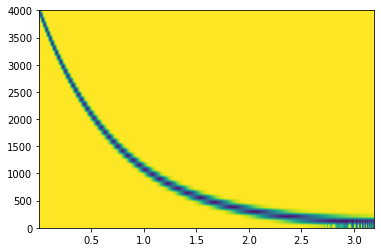

In [44]:
expect, actual = myProcessing('phaseVocoderStretch')

In [45]:
Audio(expect.x,rate=44100)

In [47]:
actual = actual[2000:]
actual.normalise()
Audio(actual.x,rate=44100)

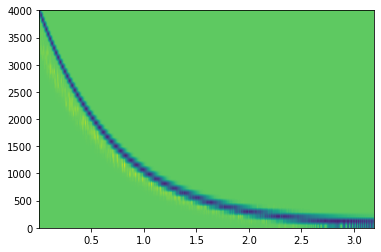

In [51]:
expect, actual = myProcessing('paulStretch')

In [49]:
Audio(expect.x,rate=44100)

In [53]:
Audio(actual.x,rate=44100)

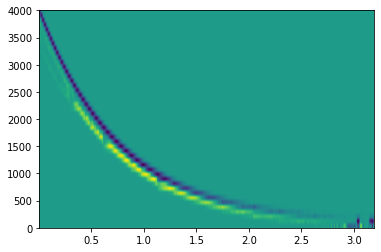

In [54]:
expect, actual = myProcessing('wsolaStretch')

In [56]:
Audio(expect.x,rate=44100)

In [57]:
Audio(actual.x,rate=44100)